# Pipeline considerando KNN

In [1]:
import pandas as pd
df = pd.read_csv("../../../data/madelon_post_eda_train.csv")
df = df.drop(columns=['Unnamed: 0'])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,target
0,0.560976,0.438356,0.588028,0.393939,0.255521,0.260870,0.566787,0.5,0.424528,0.375000,...,0.529412,0.491429,0.449367,0.578947,0.330798,0.558140,0.44,0.398577,0.516667,-1
1,0.512195,0.351598,0.316901,0.515152,0.681388,0.347826,0.693141,0.8,0.518868,0.291667,...,0.441176,0.548571,0.263291,0.587045,0.334601,0.604651,0.57,0.523132,0.633333,-1
2,0.609756,0.735160,0.454225,0.227273,0.242902,0.260870,0.389892,0.7,0.471698,0.458333,...,0.529412,0.577143,0.658228,0.558704,0.391635,0.534884,0.54,0.483986,0.527778,-1
3,0.439024,0.502283,0.492958,0.484848,0.391167,0.282609,0.299639,0.3,0.679245,0.437500,...,0.500000,0.474286,0.559494,0.348178,0.269962,0.418605,0.47,0.466192,0.322222,1
4,0.536585,0.552511,0.556338,0.545455,0.299685,0.478261,0.245487,0.7,0.537736,0.270833,...,0.470588,0.348571,0.386076,0.477733,0.418251,0.558140,0.69,0.469751,0.600000,1


In [2]:
y = df['target']
df = df.drop(columns=['target'])

Best estimator: 49


<AxesSubplot:xlabel='estimators', ylabel='score'>

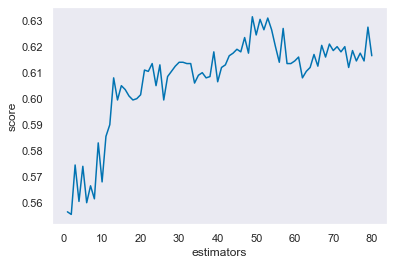

In [3]:
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, make_scorer
from sklearn.model_selection import cross_val_score, cross_val_predict

# loop to find best number of estimators based on accuracy score
result = []
best_score = 0
best_estimator = 0

for i in range(1, 81):
    modelK = KNeighborsClassifier(n_neighbors=i)
    modelK.fit(df, y)
    scores = cross_val_score(modelK, df, y, cv=5)
    if (scores.mean() > best_score):
        best_estimator = i
        best_score = scores.mean()
    result.append((i, scores.mean()))
    
# converting result into dataframe
estimators = np.array(result)[:,0]
score = np.array(result)[:,1]
d = {'estimators': estimators, 'score': score}
df_scores = pd.DataFrame(d)
print(f'Best estimator: {best_estimator}')

sns.set_theme(style="dark")
sns.set_palette("colorblind")
sns.lineplot(
        data=df_scores,
        x="estimators", 
        y="score"
    )

In [4]:
import seaborn as sns
import numpy as np
from sklearn.metrics import recall_score, make_scorer
from sklearn.model_selection import cross_val_score, cross_val_predict

modelK = KNeighborsClassifier(n_neighbors=best_estimator)
modelK.fit(df, y)

scores = cross_val_score(modelK, df, y, cv=5)
y_pred = cross_val_predict(modelK, df, y, cv=5)
print("accuracy_score: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std()))

accuracy_score: 0.63150 (+/- 0.01693)


In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, plot_confusion_matrix

# printing confusion matrix
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[752 248]
 [489 511]]
              precision    recall  f1-score   support

          -1       0.61      0.75      0.67      1000
           1       0.67      0.51      0.58      1000

    accuracy                           0.63      2000
   macro avg       0.64      0.63      0.63      2000
weighted avg       0.64      0.63      0.63      2000

